In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# KFold = regression, StratifiedKFold = classification (preserve output class proportions)
from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, HDBSCAN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
co2 = pd.read_csv("CO2_Dataset/CO2_Emissions_Canada.csv")

In [3]:
rename = {
    "Make" : "make",
    "Model" : "model",
    "Vehicle Class": "vehicle_class",
    "Engine Size(L)": "engine_size",
    "Cylinders": "cylinders",
    "Transmission" : "transmission",
    "Fuel Type": "fuel_type",
    "Fuel Consumption City (L/100 km)": "fuel_cons_city",
    "Fuel Consumption Hwy (L/100 km)": "fuel_cons_hwy",
    "Fuel Consumption Comb (L/100 km)": "fuel_cons_comb",
    "Fuel Consumption Comb (mpg)": "fuel_cons_comb_mpg",
    "CO2 Emissions(g/km)": "co2" }
co2.rename(rename, axis="columns", inplace=True)

In [4]:
co2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
co2.isnull().sum()

make                  0
model                 0
vehicle_class         0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city        0
fuel_cons_hwy         0
fuel_cons_comb        0
fuel_cons_comb_mpg    0
co2                   0
dtype: int64

In [6]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   object 
 1   model               7385 non-null   object 
 2   vehicle_class       7385 non-null   object 
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   object 
 6   fuel_type           7385 non-null   object 
 7   fuel_cons_city      7385 non-null   float64
 8   fuel_cons_hwy       7385 non-null   float64
 9   fuel_cons_comb      7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [7]:
co2.describe()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### How many different types of cylinders and engine size?

In [8]:
type = co2["cylinders"]
indiv = []
for i in type:
    if i not in indiv:
        indiv.append(i)
print(indiv)

[4, 6, 12, 8, 10, 3, 5, 16]


In [9]:
type = co2["engine_size"]
indiv2 = []
for i in type:
    if i not in indiv2:
        indiv2.append(i)
print(indiv2)
print(len(indiv2))

[2.0, 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3.0, 4.0, 6.3, 4.2, 5.2, 6.0, 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4, 4.6, 5.4, 1.6, 5.0, 1.0, 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1, 3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8.0, 2.2]
51


## Correlation

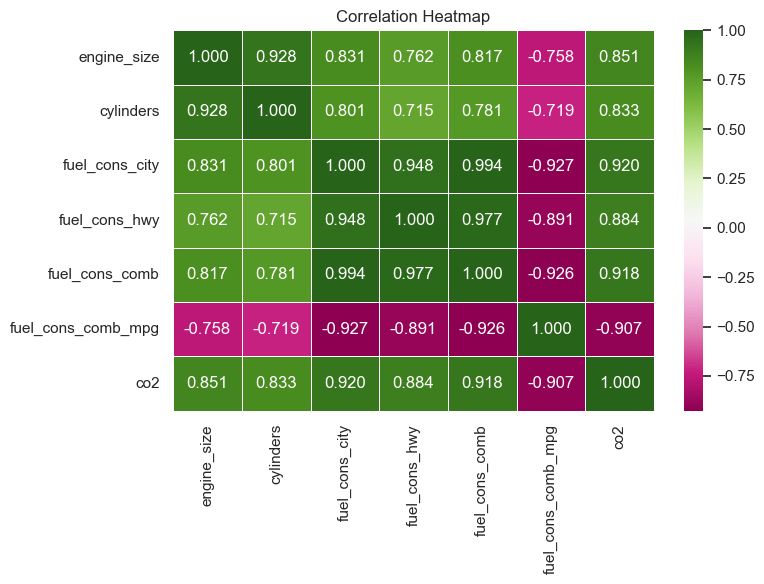

In [10]:
co2_corr = co2[["engine_size", "cylinders", "fuel_cons_city", "fuel_cons_hwy", "fuel_cons_comb", 
                "fuel_cons_comb_mpg", "co2"]]
co2_corr.describe()
correlation_matrix = co2_corr.corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".3f", linewidths=0.5)
plt.xticks(rotation = 90)
plt.title("Correlation Heatmap")
ax.figure.tight_layout()
plt.savefig("Plots/corr_heat.png", dpi=300)
plt.show()

## VIF

In [19]:
# the independent variables set 
X = co2[["cylinders", "engine_size", "fuel_cons_comb", "fuel_cons_comb_mpg"]] 
X = add_constant(X) 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

# the independent variables set 
X = co2[["cylinders", "engine_size", "fuel_cons_comb"]] 
X = add_constant(X) 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# the independent variables set 
X = co2[["cylinders", "fuel_cons_comb"]] 
X = add_constant(X) 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

# the independent variables set 
X = co2[["engine_size", "fuel_cons_comb"]] 
X = add_constant(X) 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

              feature         VIF
0               const  392.113262
1           cylinders    7.257795
2         engine_size    8.530847
3      fuel_cons_comb    9.004078
4  fuel_cons_comb_mpg    6.985516
          feature        VIF
0           const  21.557721
1       cylinders   7.250291
2     engine_size   8.523051
3  fuel_cons_comb   3.041778
          feature        VIF
0           const  15.429483
1       cylinders   2.559071
2  fuel_cons_comb   2.559071
          feature        VIF
0           const  17.166893
1     engine_size   3.008306
2  fuel_cons_comb   3.008306


## Group by Fuel Type

In [12]:
def plot_per_fuel(feat, ylab):
    
    feat_group = co2.groupby("fuel_type")
    plot_feat = feat_group[feat].mean()
    
    fig = plt.figure(figsize=[15,7])
    plot_feat.sort_values().plot(kind = "bar", fontsize = 10)
    plt.ylabel(ylab)
    plt.show()
    
    return

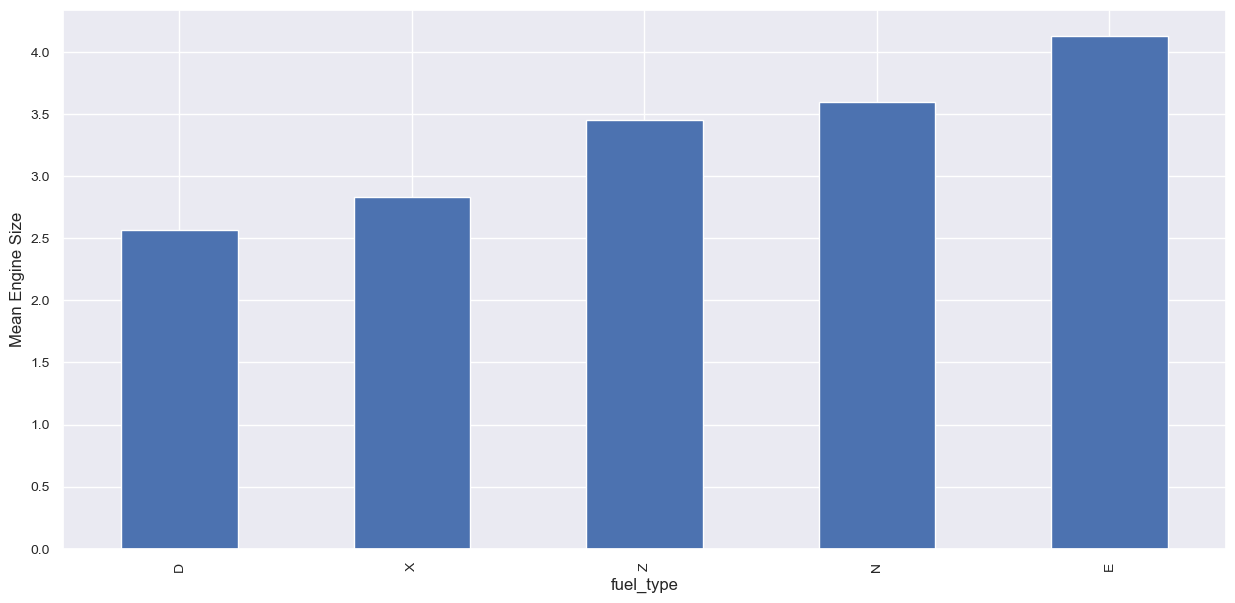

In [13]:
plot_per_fuel("engine_size", "Mean Engine Size")

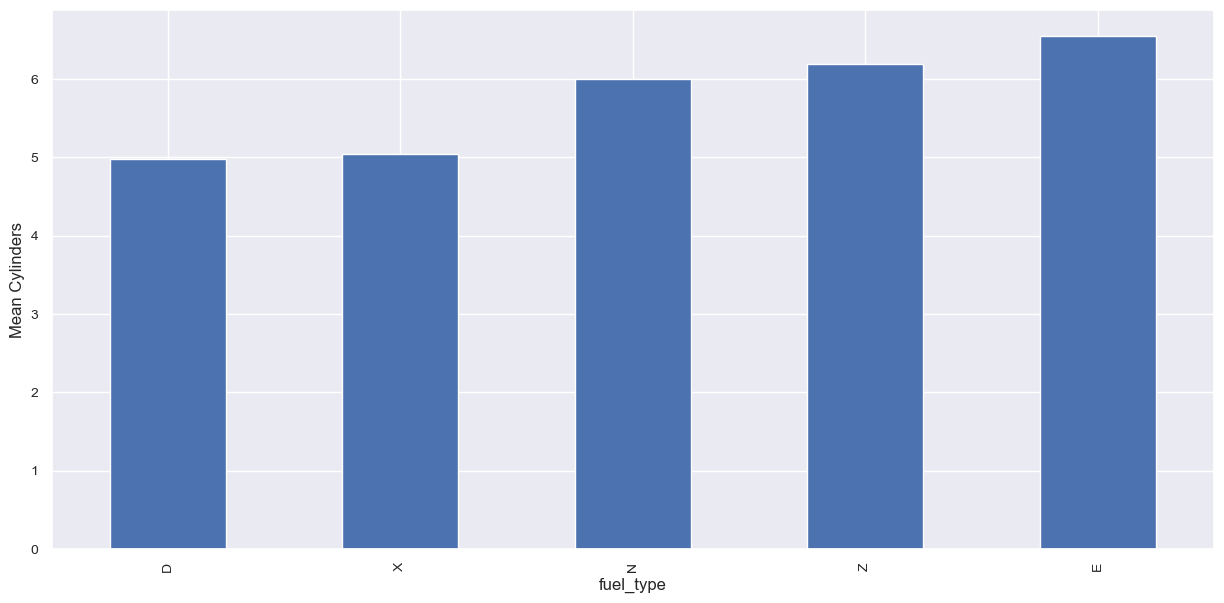

In [14]:
plot_per_fuel("cylinders", "Mean Cylinders")

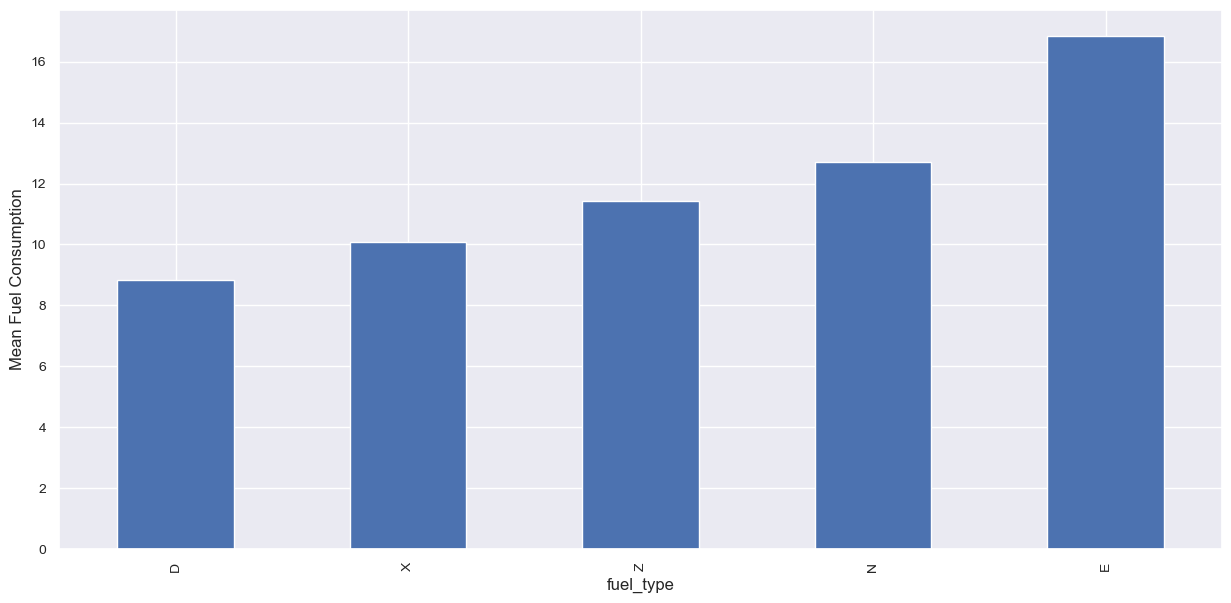

In [15]:
plot_per_fuel("fuel_cons_comb", "Mean Fuel Consumption")

### Automatic vs Manual

In [16]:
def plot_per_transmission(feat, ylab):
    
    feat_group = co2.groupby("transmission")
    plot_feat = feat_group[feat].mean()
    
    fig = plt.figure(figsize=[15,7])
    plot_feat.sort_values().plot(kind = "bar", fontsize = 10)
    plt.ylabel(ylab)
    plt.show()
    
    return

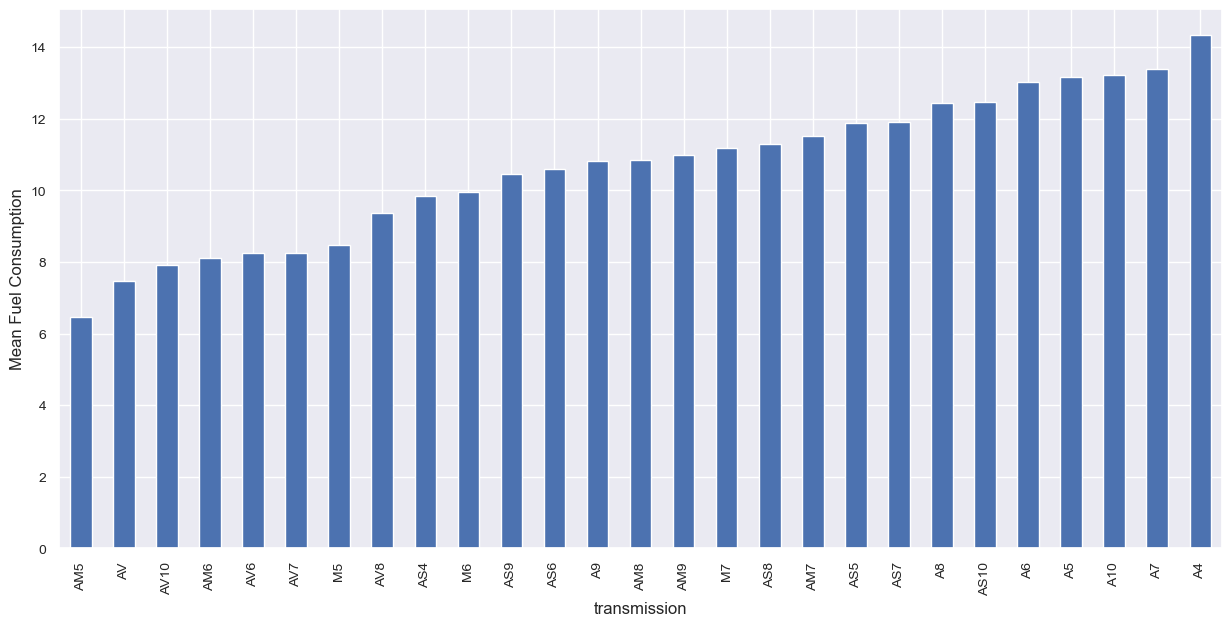

In [17]:
plot_per_transmission("fuel_cons_comb", "Mean Fuel Consumption")